## Matplotlib

Для отображения в notebook

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Сейчас пора, когда многие болеют. Построим зависимость числа больных в семье Ивановых и Сидоровых от температуры на улице.

Мы имеем дискретное распределение, поэтому самое напрашиваемое представление это обычные точки

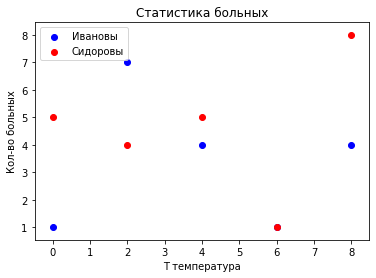

In [5]:
family_ivan = np.random.poisson(5, 5)
family_sid = np.random.poisson(5, 5)

x = np.arange(0, 10, 2)
plt.scatter(x, family_ivan, label='Ивановы', c='b')
plt.scatter(x, family_sid, label='Сидоровы', c='r')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Чтобы отследить зависмость лучше, воспользуемся непрерывным представление

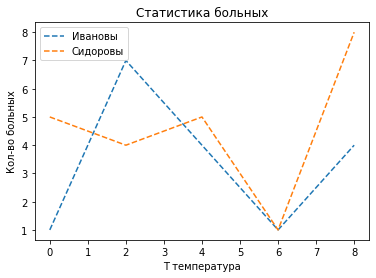

In [6]:
plt.plot(x, family_ivan, '--', label='Ивановы')
plt.plot(x, family_sid, '--', label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Давайте попробуем другое представление полученных данных c помощью bar-chart:

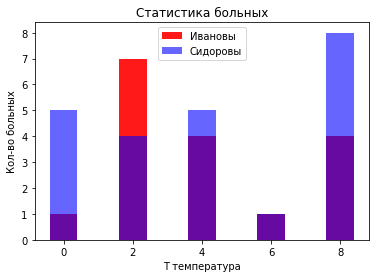

In [7]:
plt.bar(x, family_ivan, alpha=0.9
      , label='Ивановы', color='r')
plt.bar(x, family_sid, alpha=0.6, label='Сидоровы', color='b')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()


Давайте функции зависимоcти сделаем более гладкими:

In [8]:
from scipy.interpolate import interp1d
f_ivan = interp1d(np.arange(0, 10, 2), family_ivan, kind='quadratic', fill_value="extrapolate")
f_sid = interp1d(np.arange(0, 10, 2), family_sid, kind='quadratic', fill_value="extrapolate")

Отобразим получившиеся функции:

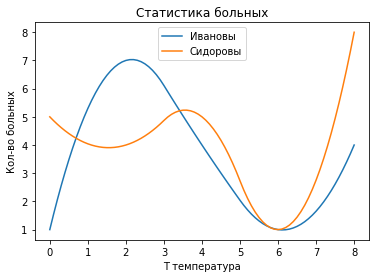

In [9]:
xnew = np.arange(0, 8.1, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Найдем самую оптимальную температуру для каждой семьи

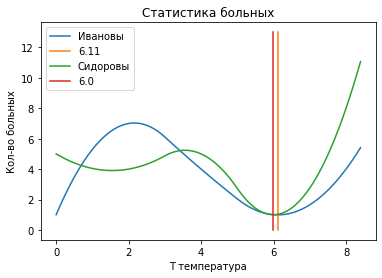

<Figure size 432x288 with 0 Axes>

In [15]:
from scipy.optimize import minimize
max_ivan = minimize(f_ivan, x0=4)
max_sid = minimize(f_sid, x0=4)
xnew = np.arange(0, 8.5, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot([max_ivan.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_ivan.x[0].round(2)))
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.plot([max_sid.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_sid.x[0].round(2)))
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()
plt.savefig('img.jpg', format='png')

In [14]:
plt.savefig('img.jpg', format='png')

<Figure size 432x288 with 0 Axes>